# Import Dependencies

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

C:\Users\alyss\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Import Dataset

In [2]:
# get preprocessed dataframe from separate file
%run preprocessing.ipynb

In [3]:
df2.head(10)

,State,County,State code,County code,Year span,Measure name,Measure id,Numerator,Denominator,Raw value,fipscode,FIPS Code
0,US,United States,0,0,2003-2005,Violent crime rate,43,1.328751e+06,2.748771e+08,483.398066,0.0,00000
1,US,United States,0,0,2004-2006,Violent crime rate,43,1.340929e+06,2.776128e+08,483.021233,0.0,00000
2,US,United States,0,0,2005-2007,Violent crime rate,43,1.355853e+06,2.804077e+08,483.529230,0.0,00000
3,US,United States,0,0,2006-2008,Violent crime rate,43,1.366928e+06,2.876146e+08,475.263942,0.0,00000
4,US,United States,0,0,2007-2009,Violent crime rate,43,1.339439e+06,2.925763e+08,457.808585,0.0,00000
5,US,United States,0,0,2008-2010,Violent crime rate,43,1.295937e+06,2.989479e+08,433.499335,0.0,00000
6,US,United States,0,0,2009-2011,Violent crime rate,43,1.237998e+06,3.024210e+08,409.362388,0.0,00000
7,AL,Alabama,1,0,2003-2005,Violent crime rate,43,1.817483e+04,4.221248e+06,430.555907,1000.0,01000
8,AL,Alabama,1,0,2004-2006,Violent crime rate,43,1.767717e+04,4.042098e+06,437.326488,1000.0,01000
9,AL,Alabama,1,0,2005-2007,Violent crime rate,43,1.745817e+04,3.979110e+06,438.745515,1000.0,01000


# Explore Dataset

In [8]:
# exclude US values
counties_df = df2.loc[(df2['State'] != "US") & (df2['County code'] != 0)]
counties_df

,State,County,State code,County code,Year span,Measure name,Measure id,Numerator,Denominator,Raw value,fipscode,FIPS Code
14,AL,Autauga County,1,1,2003-2005,Violent crime rate,43,141.000000,46438.66667,303.626288,1001.0,01001
15,AL,Autauga County,1,1,2004-2006,Violent crime rate,43,137.666667,47539.66667,289.582734,1001.0,01001
16,AL,Autauga County,1,1,2005-2007,Violent crime rate,43,125.666667,49101.00000,255.935046,1001.0,01001
17,AL,Autauga County,1,1,2006-2008,Violent crime rate,43,128.333333,50172.66667,255.783362,1001.0,01001
18,AL,Autauga County,1,1,2007-2009,Violent crime rate,43,148.000000,50945.00000,290.509373,1001.0,01001
...,...,...,...,...,...,...,...,...,...,...,...,...
303478,WY,Weston County,56,45,2007,Daily fine particulate matter,125,NaN,NaN,9.370000,56045.0,56045
303479,WY,Weston County,56,45,2008,Daily fine particulate matter,125,NaN,NaN,7.450000,56045.0,56045
303480,WY,Weston County,56,45,2009,Daily fine particulate matter,125,NaN,NaN,12.770000,56045.0,56045
303481,WY,Weston County,56,45,2010,Daily fine particulate matter,125,NaN,NaN,12.110000,56045.0,56045


In [9]:
counties_df['State'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

In [10]:
counties_df['State'].nunique()

51

In [11]:
states_df = df2.loc[(df2['State'] != "US") & (df2['County code'] == 0)]
states_df

,State,County,State code,County code,Year span,Measure name,Measure id,Numerator,Denominator,Raw value,fipscode,FIPS Code
7,AL,Alabama,1,0,2003-2005,Violent crime rate,43,18174.83333,4221248.167,430.555907,1000.0,01000
8,AL,Alabama,1,0,2004-2006,Violent crime rate,43,17677.16667,4042098.333,437.326488,1000.0,01000
9,AL,Alabama,1,0,2005-2007,Violent crime rate,43,17458.16667,3979110.000,438.745515,1000.0,01000
10,AL,Alabama,1,0,2006-2008,Violent crime rate,43,18611.00000,4103878.667,453.497813,1000.0,01000
11,AL,Alabama,1,0,2007-2009,Violent crime rate,43,19876.50000,4434700.167,448.203920,1000.0,01000
...,...,...,...,...,...,...,...,...,...,...,...,...
303271,WY,Wyoming,56,0,2007,Daily fine particulate matter,125,NaN,NaN,9.070000,56000.0,56000
303272,WY,Wyoming,56,0,2008,Daily fine particulate matter,125,NaN,NaN,7.280000,56000.0,56000
303273,WY,Wyoming,56,0,2009,Daily fine particulate matter,125,NaN,NaN,13.080000,56000.0,56000
303274,WY,Wyoming,56,0,2010,Daily fine particulate matter,125,NaN,NaN,12.430000,56000.0,56000


In [12]:
states_df.loc[(states_df['State'] == "CA") & (states_df['Measure name'] == "Violent crime rate")]

,State,County,State code,County code,Year span,Measure name,Measure id,Numerator,Denominator,Raw value,fipscode,FIPS Code
1323,CA,California,6,0,2003-2005,Violent crime rate,43,198073.1667,35836487.00,552.713682,6000.0,06000
1324,CA,California,6,0,2004-2006,Violent crime rate,43,194373.5000,36161326.50,537.517616,6000.0,06000
1325,CA,California,6,0,2005-2007,Violent crime rate,43,192006.5000,36380053.50,527.779598,6000.0,06000
1326,CA,California,6,0,2006-2008,Violent crime rate,43,190171.3333,36589143.33,519.747980,6000.0,06000
1327,CA,California,6,0,2007-2009,Violent crime rate,43,183689.3333,36757181.67,499.737262,6000.0,06000
1328,CA,California,6,0,2008-2010,Violent crime rate,43,174690.0000,36990762.00,472.253045,6000.0,06000
1329,CA,California,6,0,2009-2011,Violent crime rate,43,164560.0000,37295024.00,441.238488,6000.0,06000


In [13]:
states_df.loc[(states_df['State'] == "CA") & (states_df['Measure name'] == "Unemployment")]

,State,County,State code,County code,Year span,Measure name,Measure id,Numerator,Denominator,Raw value,fipscode,FIPS Code
24444,CA,California,6,0,2002,Unemployment,23,1162785.0,17343585.0,0.067044,6000.0,06000
24445,CA,California,6,0,2003,Unemployment,23,1190603.0,17390668.0,0.068462,6000.0,06000
24446,CA,California,6,0,2004,Unemployment,23,1089658.0,17444439.0,0.062464,6000.0,06000
24447,CA,California,6,0,2005,Unemployment,23,952564.0,17544766.0,0.054293,6000.0,06000
24448,CA,California,6,0,2006,Unemployment,23,865428.0,17686698.0,0.048931,6000.0,06000
24449,CA,California,6,0,2007,Unemployment,23,960303.0,17921040.0,0.053585,6000.0,06000
24450,CA,California,6,0,2008,Unemployment,23,1313057.0,18203079.0,0.072134,6000.0,06000
24451,CA,California,6,0,2009,Unemployment,23,2063867.0,18208352.0,0.113347,6000.0,06000
24452,CA,California,6,0,2010,Unemployment,23,2264906.0,18316421.0,0.123654,6000.0,06000
24453,CA,California,6,0,2011,Unemployment,23,2158332.0,18384891.0,0.117397,6000.0,06000


In [15]:
states_df.loc[(states_df['State'] == "CA") & (states_df['Measure name'] == "Children in poverty")]

,State,County,State code,County code,Year span,Measure name,Measure id,Numerator,Denominator,Raw value,fipscode,FIPS Code
59957,CA,California,6,0,2002,Children in poverty,24,1795674.0,NaN,0.192,6000.0,06000
59958,CA,California,6,0,2003,Children in poverty,24,1866535.0,NaN,0.195,6000.0,06000
59959,CA,California,6,0,2003,Children in poverty,24,1866535.0,NaN,0.195,6000.0,06000
59960,CA,California,6,0,2004,Children in poverty,24,1809423.0,NaN,0.187,6000.0,06000
59961,CA,California,6,0,2004,Children in poverty,24,1809423.0,NaN,0.187,6000.0,06000
59962,CA,California,6,0,2005,Children in poverty,24,1761755.0,NaN,0.185,6000.0,06000
59963,CA,California,6,0,2006,Children in poverty,24,1693631.0,NaN,0.181,6000.0,06000
59964,CA,California,6,0,2007,Children in poverty,24,1598466.0,NaN,0.173,6000.0,06000
59965,CA,California,6,0,2008,Children in poverty,24,1702065.0,NaN,0.185,6000.0,06000
59966,CA,California,6,0,2009,Children in poverty,24,1846994.0,NaN,0.199,6000.0,06000


In [23]:
test = states_df[['State', 'Year span', 'Measure name', 'Raw value', 'FIPS Code']].loc[(states_df['State'] == "CA")]
test

,State,Year span,Measure name,Raw value,FIPS Code
1323,CA,2003-2005,Violent crime rate,552.713682,06000
1324,CA,2004-2006,Violent crime rate,537.517616,06000
1325,CA,2005-2007,Violent crime rate,527.779598,06000
1326,CA,2006-2008,Violent crime rate,519.747980,06000
1327,CA,2007-2009,Violent crime rate,499.737262,06000
...,...,...,...,...,...
276451,CA,2007,Daily fine particulate matter,10.870000,06000
276452,CA,2008,Daily fine particulate matter,11.720000,06000
276453,CA,2009,Daily fine particulate matter,12.630000,06000
276454,CA,2010,Daily fine particulate matter,8.960000,06000


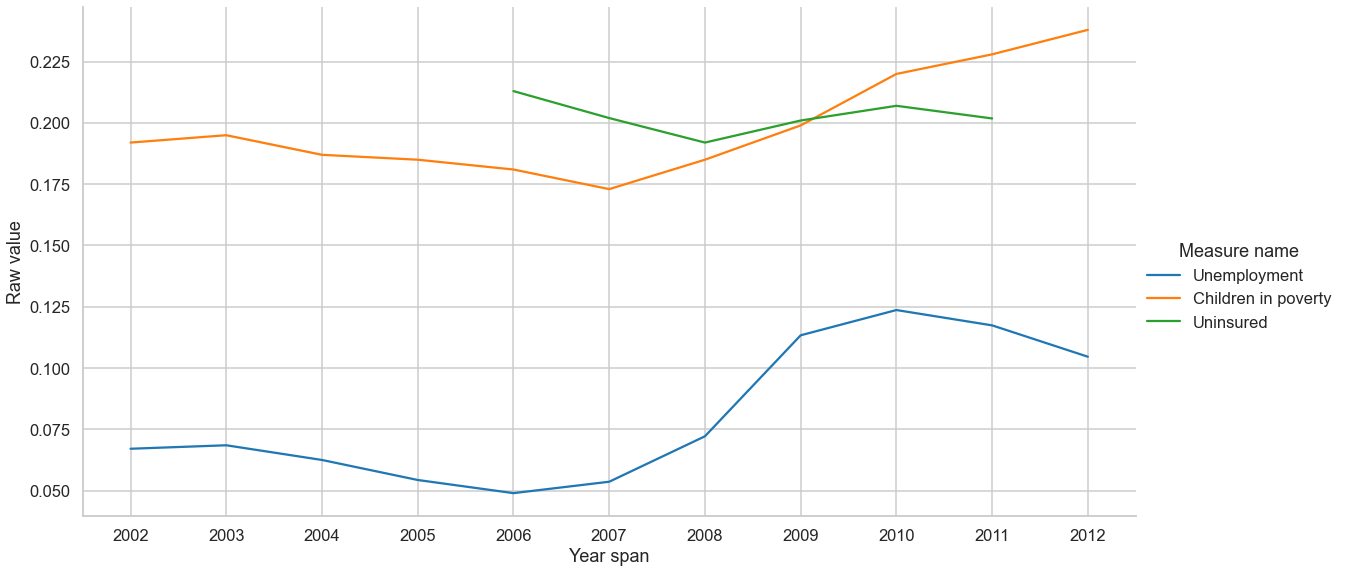

In [63]:
sns.set_context("talk")
sns.set_style("whitegrid")
sns.relplot(
    data=test.loc[(test['Measure name'] == 'Unemployment') | (test['Measure name'] == 'Children in poverty') | (test['Measure name'] == "Uninsured")],
    x="Year span", y="Raw value", hue="Measure name", kind="line", height=8, aspect=2
)

In [74]:
df2.loc[(df2['County'] == "United States") | (df2['County'] == "California") & (df2['Measure name'] == "Violent crime rate")]

,State,County,State code,County code,Year span,Measure name,Measure id,Numerator,Denominator,Raw value,fipscode,FIPS Code
0,US,United States,0,0,2003-2005,Violent crime rate,43,1328750.667,274877117.0,483.398066,0.0,00000
1,US,United States,0,0,2004-2006,Violent crime rate,43,1340928.667,277612778.5,483.021233,0.0,00000
2,US,United States,0,0,2005-2007,Violent crime rate,43,1355853.167,280407694.7,483.529230,0.0,00000
3,US,United States,0,0,2006-2008,Violent crime rate,43,1366928.333,287614567.7,475.263942,0.0,00000
4,US,United States,0,0,2007-2009,Violent crime rate,43,1339439.333,292576281.2,457.808585,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...
274750,US,United States,0,0,2007,Daily fine particulate matter,125,NaN,NaN,11.020000,0.0,00000
274751,US,United States,0,0,2008,Daily fine particulate matter,125,NaN,NaN,10.400000,0.0,00000
274752,US,United States,0,0,2009,Daily fine particulate matter,125,NaN,NaN,12.090000,0.0,00000
274753,US,United States,0,0,2010,Daily fine particulate matter,125,NaN,NaN,11.450000,0.0,00000


In [78]:
crime_df = df2.loc[df2['Measure name'] == "Violent crime rate"]
crime_df

,State,County,State code,County code,Year span,Measure name,Measure id,Numerator,Denominator,Raw value,fipscode,FIPS Code
0,US,United States,0,0,2003-2005,Violent crime rate,43,1.328751e+06,2.748771e+08,483.398066,0.0,00000
1,US,United States,0,0,2004-2006,Violent crime rate,43,1.340929e+06,2.776128e+08,483.021233,0.0,00000
2,US,United States,0,0,2005-2007,Violent crime rate,43,1.355853e+06,2.804077e+08,483.529230,0.0,00000
3,US,United States,0,0,2006-2008,Violent crime rate,43,1.366928e+06,2.876146e+08,475.263942,0.0,00000
4,US,United States,0,0,2007-2009,Violent crime rate,43,1.339439e+06,2.925763e+08,457.808585,0.0,00000
...,...,...,...,...,...,...,...,...,...,...,...,...
22360,WY,Weston County,56,45,2005-2007,Violent crime rate,43,1.000000e+01,5.885000e+03,169.923534,56045.0,56045
22361,WY,Weston County,56,45,2006-2008,Violent crime rate,43,1.100000e+01,5.970333e+03,184.244319,56045.0,56045
22362,WY,Weston County,56,45,2007-2009,Violent crime rate,43,1.133333e+01,6.093333e+03,185.995624,56045.0,56045
22363,WY,Weston County,56,45,2008-2010,Violent crime rate,43,8.333333e+00,6.141000e+03,135.699940,56045.0,56045


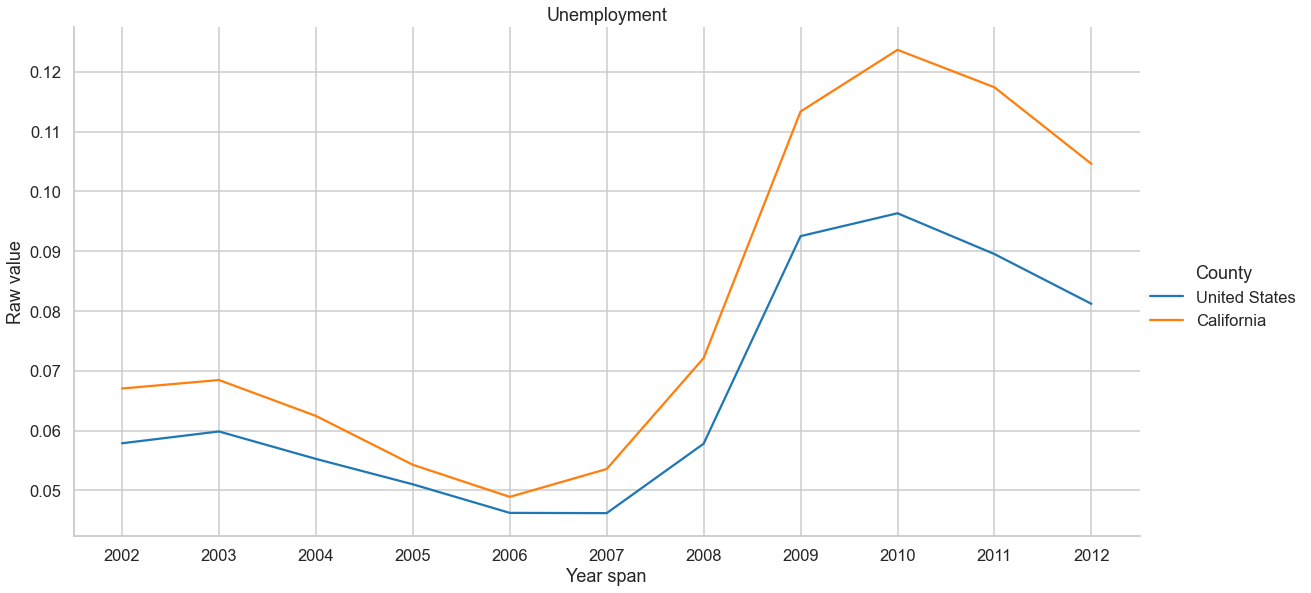

In [90]:
sns.set_context("talk")
sns.set_style("whitegrid")
sns.relplot(
    data=unemp_df.loc[(unemp_df['County'] == "United States") | (unemp_df['County'] == "California")],
    x="Year span", y="Raw value", hue="County", kind="line", height=8, aspect=2
).set(title='Unemployment')

In [141]:
# create plotting function
def compare_plot(data, measure):
    df = data.loc[data["Measure name"] == measure]
    sns.set_context("poster")
    sns.set_style("whitegrid")
    ax = sns.relplot(
        data=df.loc[(df['County'] == "United States") | (df['County'] == "California")],
        x="Year span", y="Raw value", hue="County", kind="line", height=8, aspect=1.75
    ).set(title=measure)

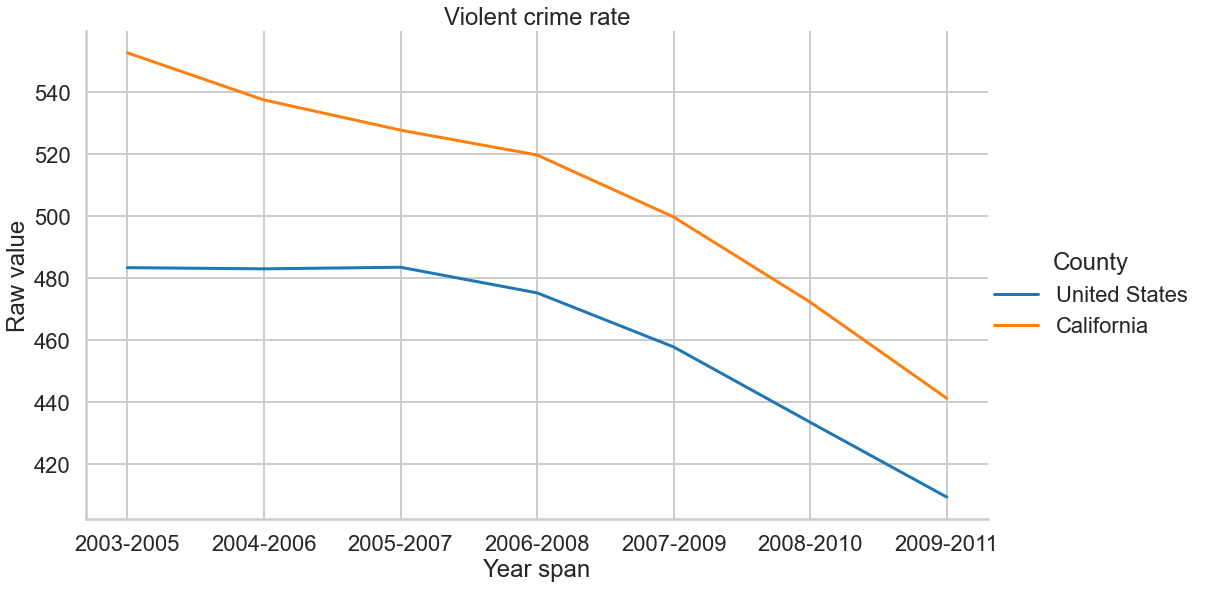

In [142]:
compare_plot(df2, "Violent crime rate")

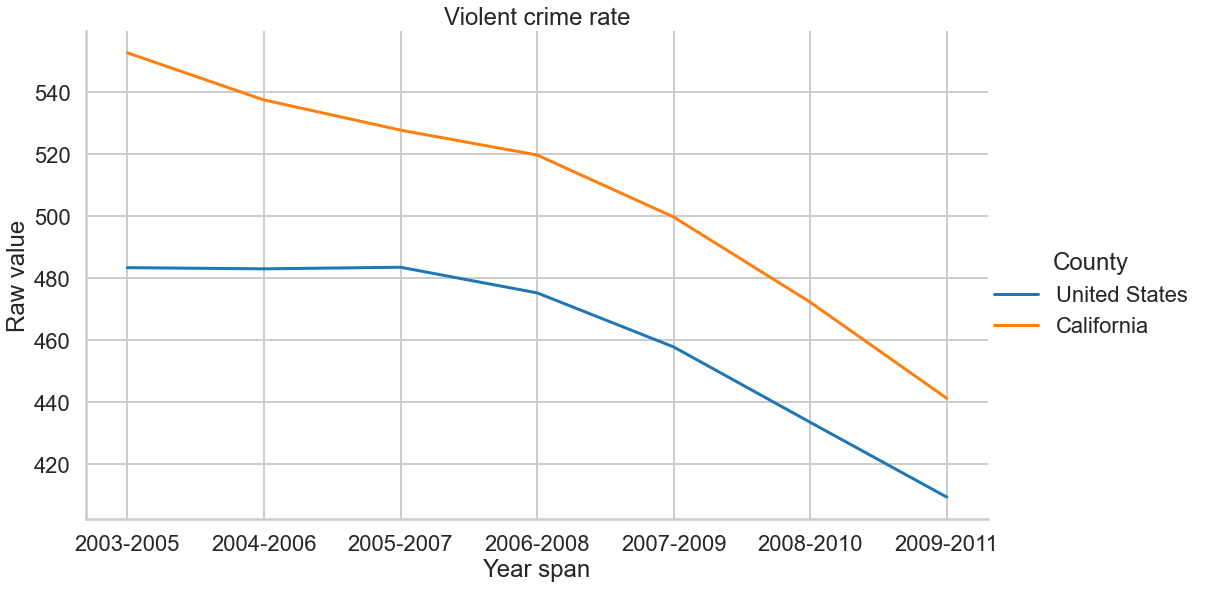

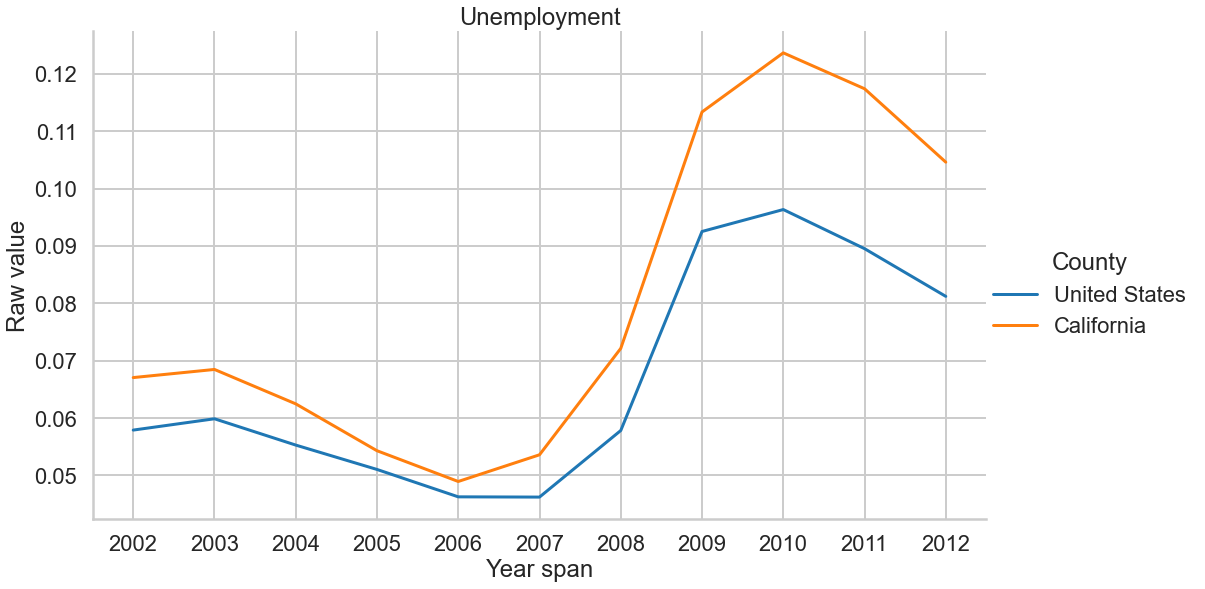

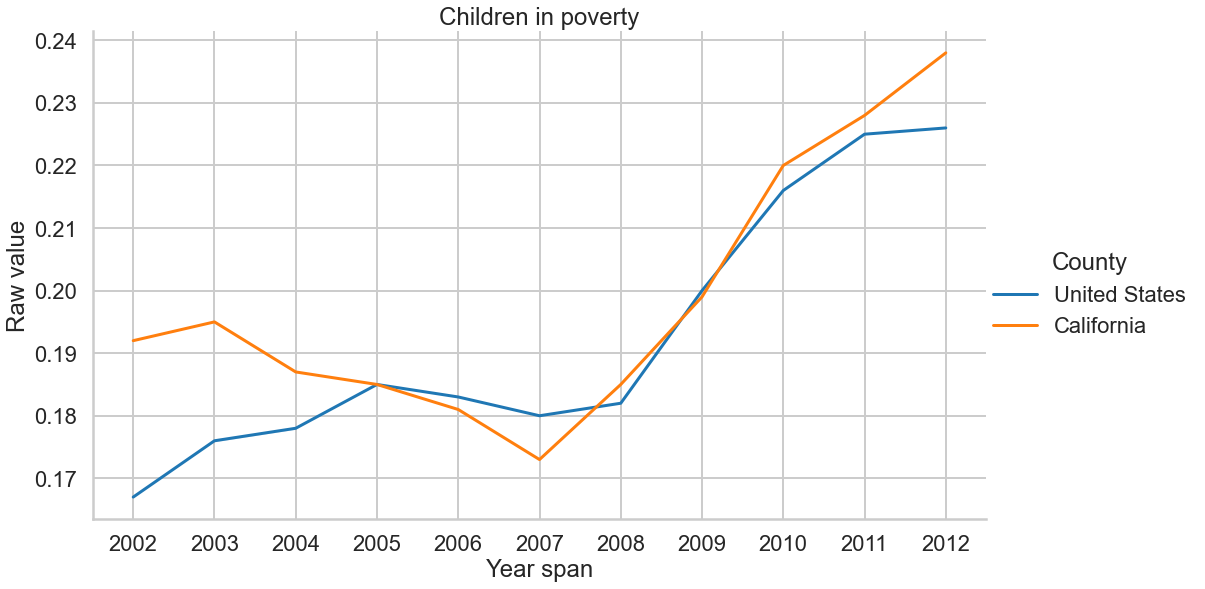

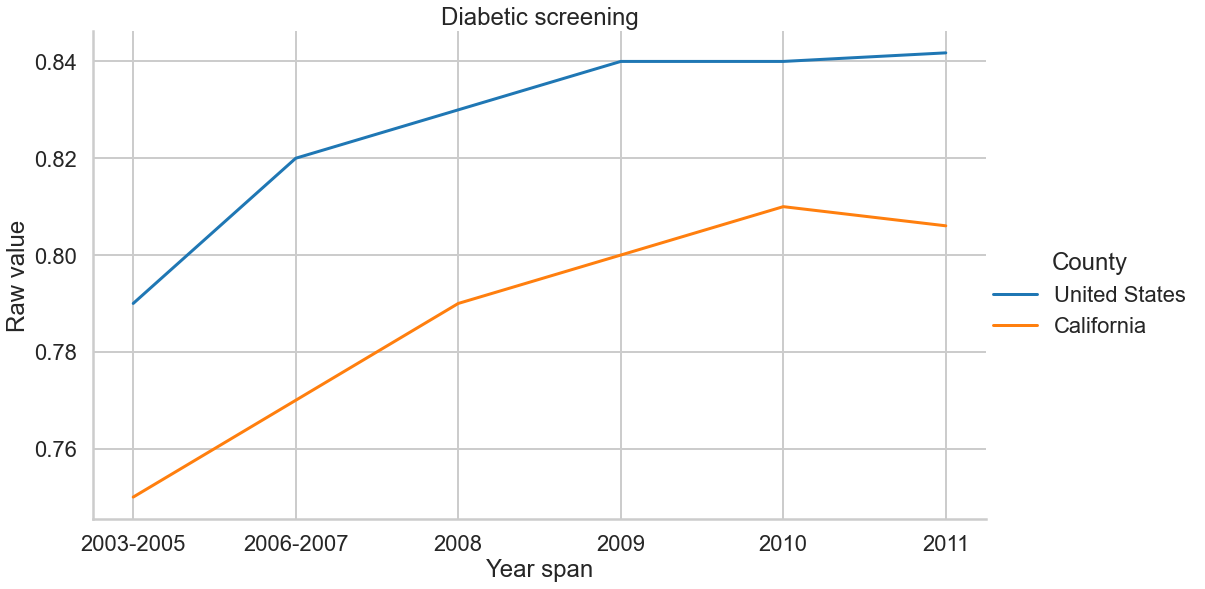

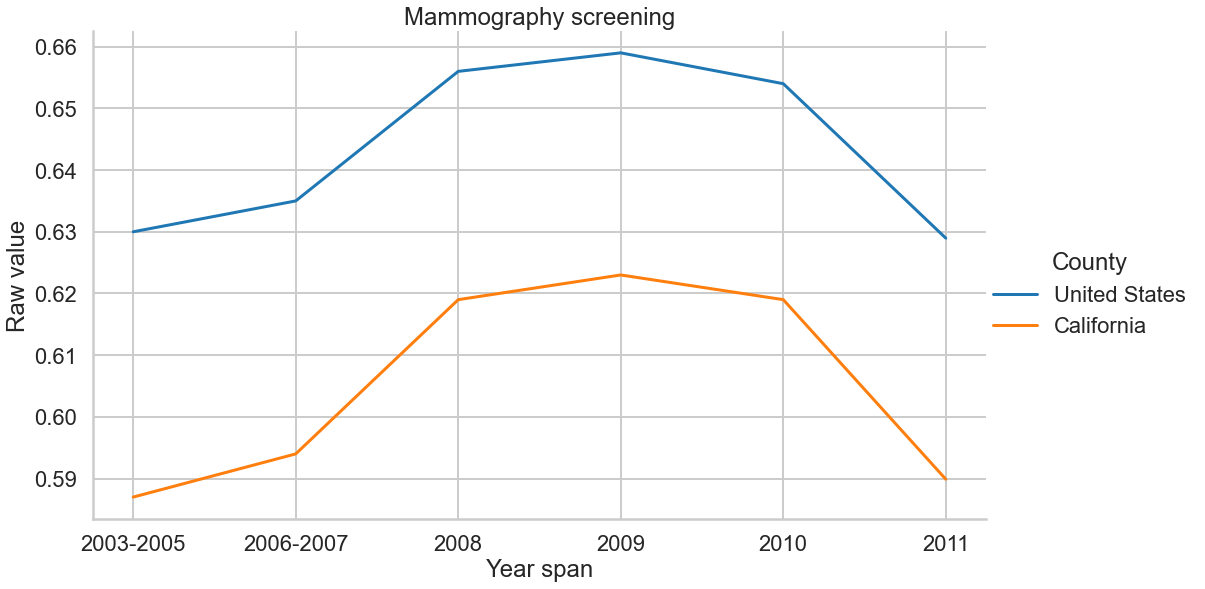

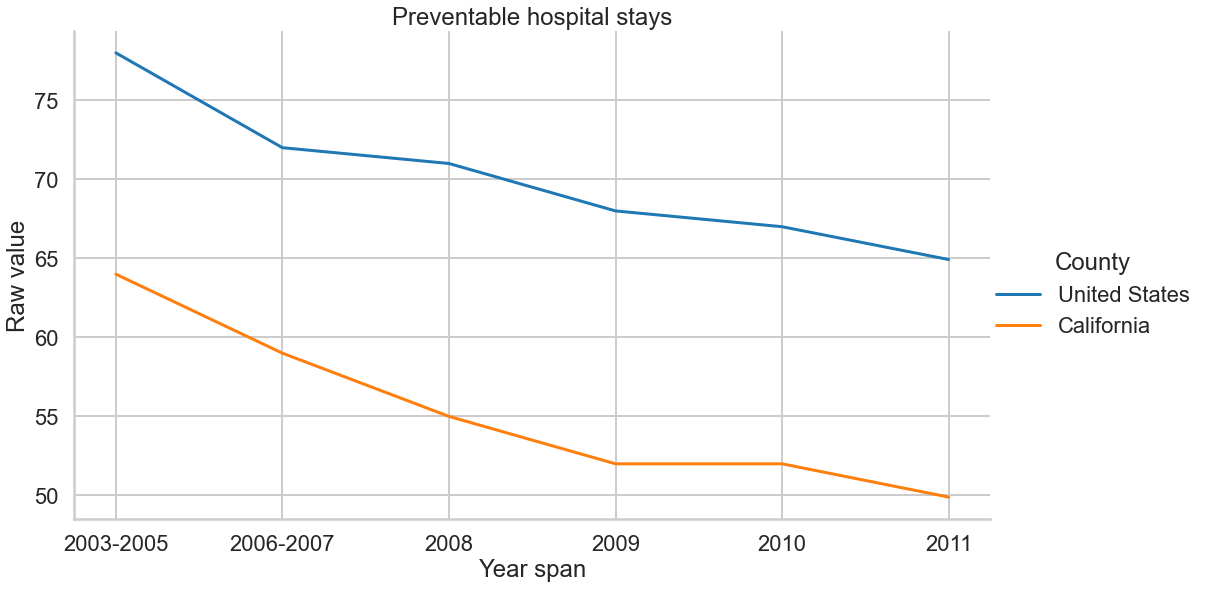

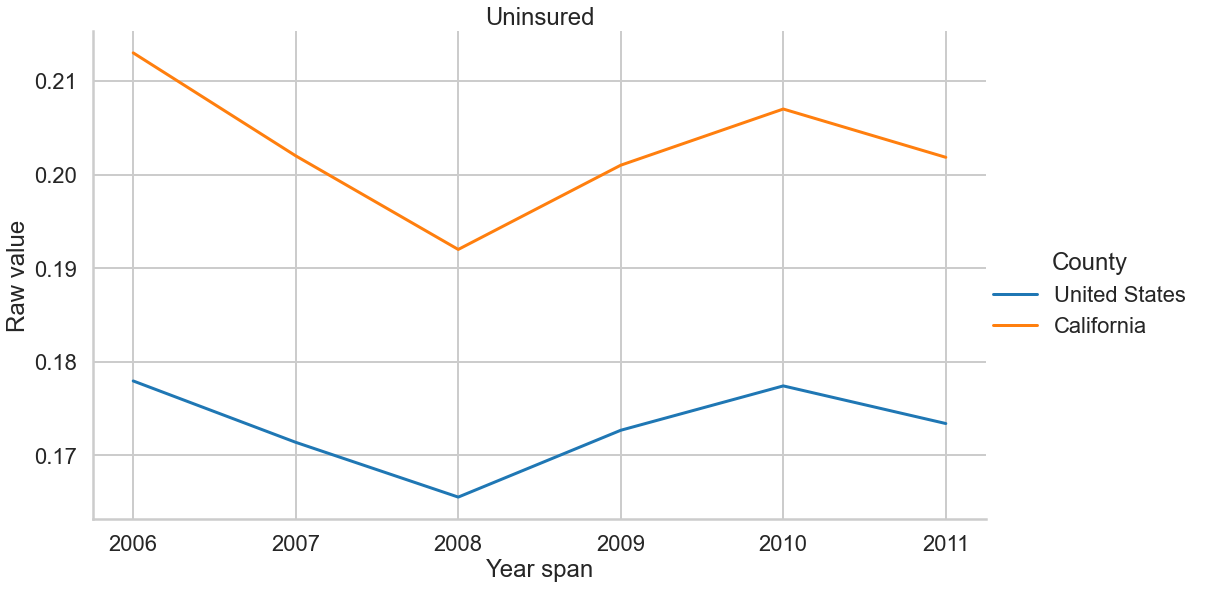

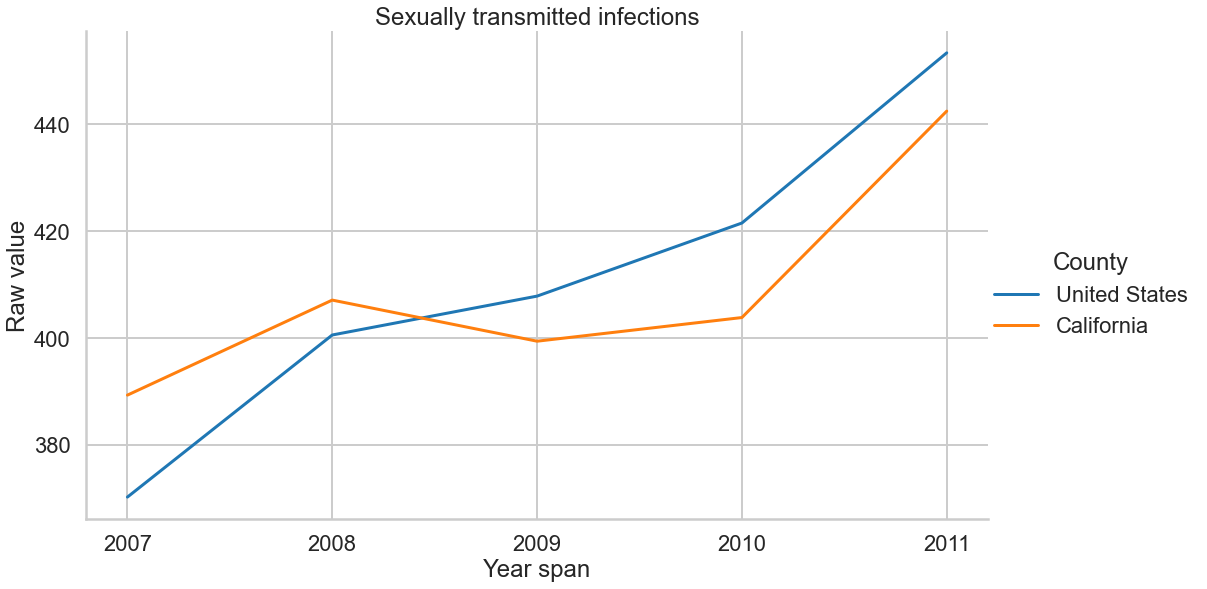

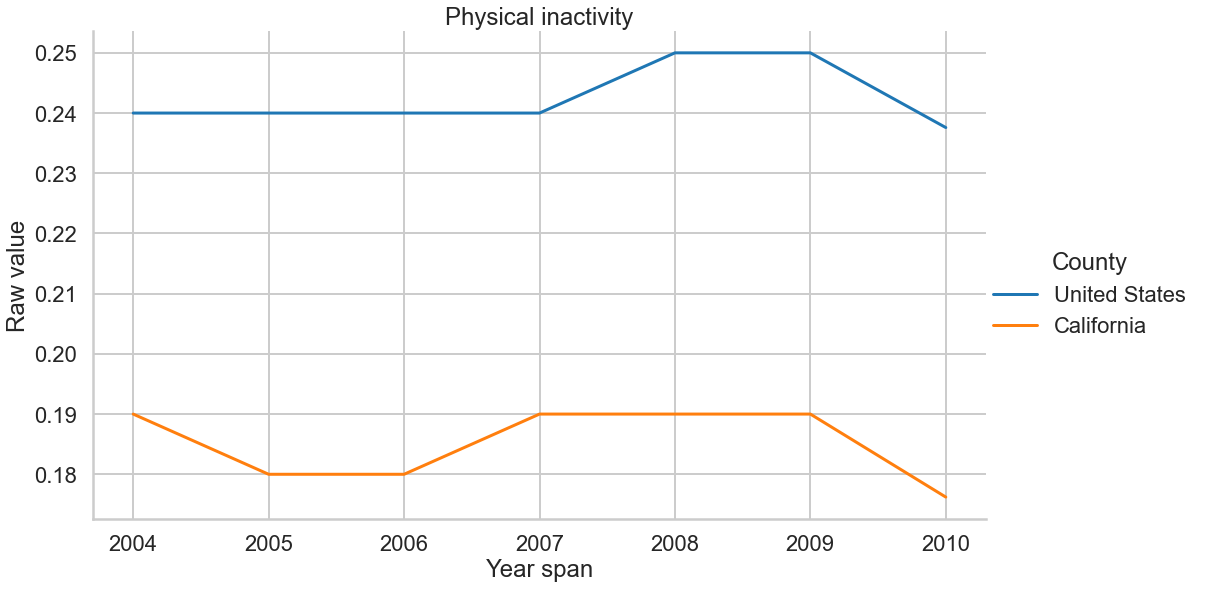

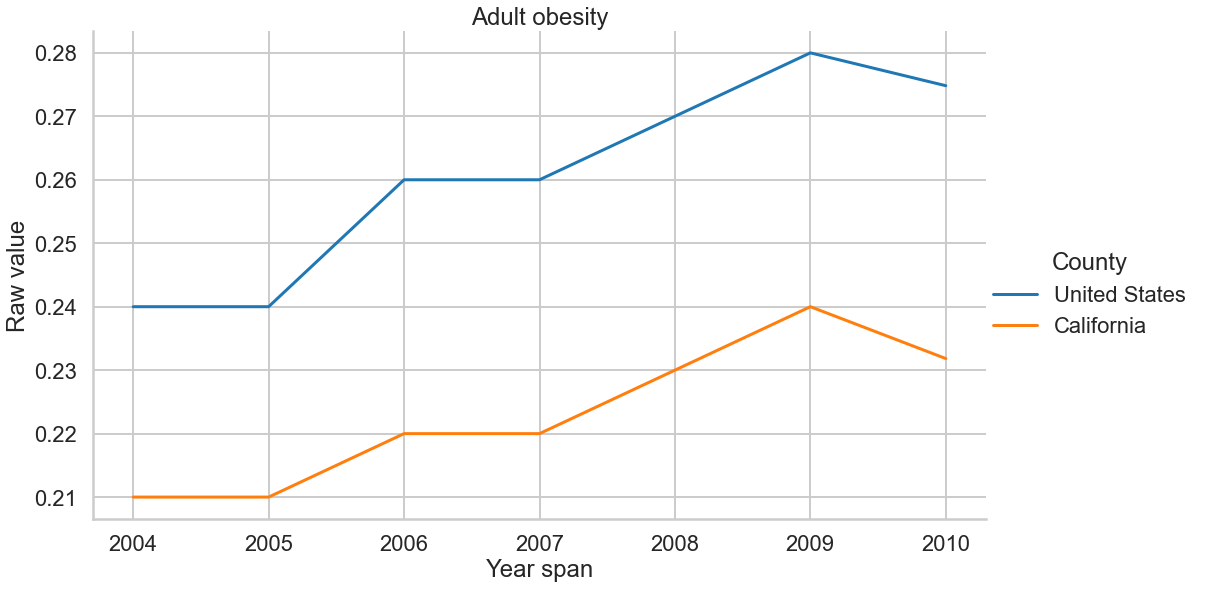

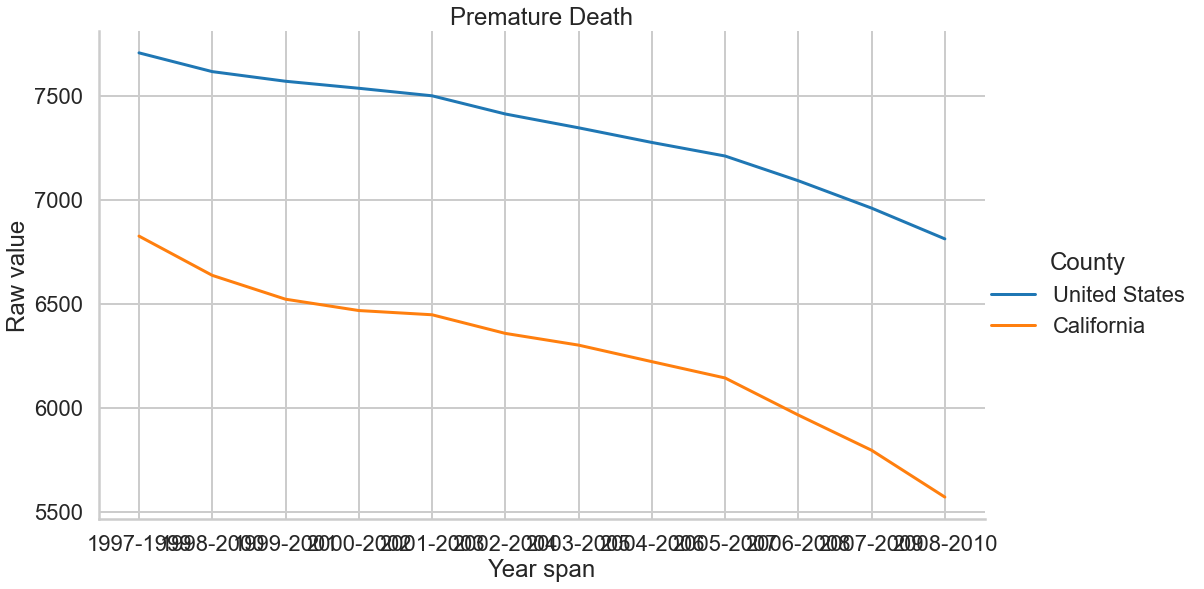

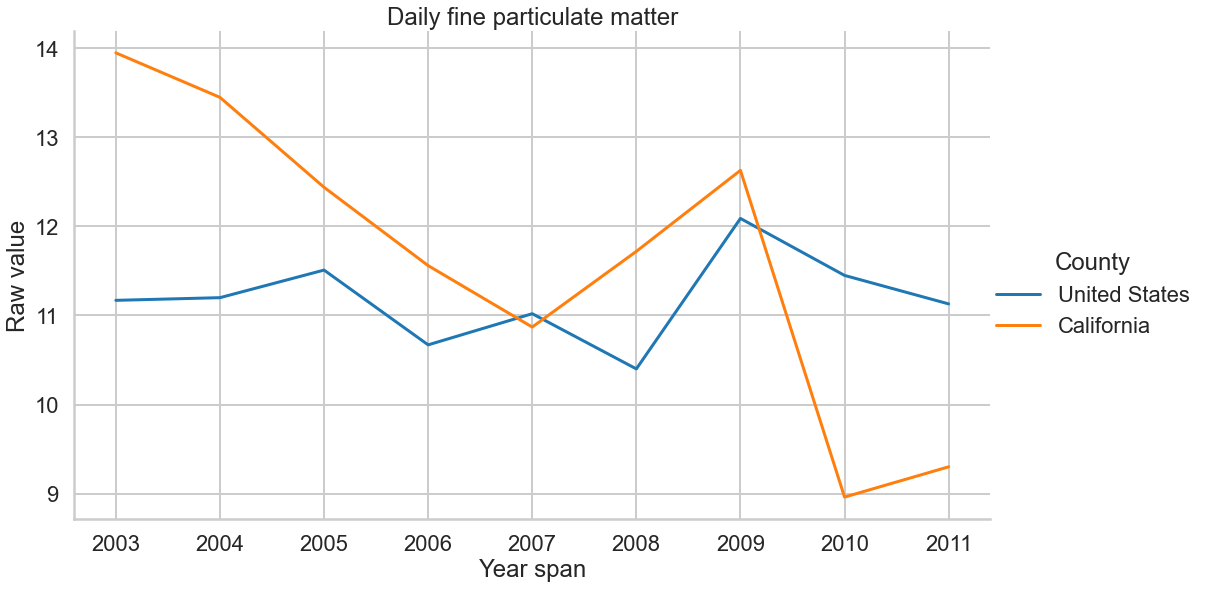

In [138]:
measures = list(df2['Measure name'].unique())

for measure in measures:
    compare_plot(df2, measure)